### Importing the libraries

In [44]:
import pandas as pd
import numpy as np

### Lets import the Data

In [45]:
data = pd.read_csv("RS final.csv")
df = data.copy()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-04-03,11.250000,12.375000,11.250000,12.031250,8.401433,77000
1,2000-04-04,12.031250,12.031250,11.437500,11.625000,8.117750,33200
2,2000-04-05,11.562500,11.750000,11.500000,11.750000,8.205038,13600
3,2000-04-06,11.812500,12.062500,11.812500,12.062500,8.423261,28800
4,2000-04-07,11.937500,12.062500,11.906250,12.000000,8.379616,46600
...,...,...,...,...,...,...,...
6030,2024-03-22,332.010010,332.839996,328.559998,330.429993,330.429993,207400
6031,2024-03-25,332.230011,336.130005,331.489990,331.529999,331.529999,211400
6032,2024-03-26,332.329987,334.679993,329.109985,331.380005,331.380005,203100
6033,2024-03-27,333.700012,337.109985,333.299988,336.899994,336.899994,170400


### Let's understand the data

In [46]:
df.shape

(6035, 7)

checking for null values

In [47]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
df.dtypes 

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [49]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace= True)

In [50]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [51]:
# date_col = [col for col in df.columns if df[col].dtype == "datetime64[ns]"]
# cat_cols = [col for col in df.columns if df[col].dtype == "object"]
con_cols = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]


In [52]:
# cat_cols

In [53]:
# date_col

In [54]:
con_cols

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

### Lets visualize the data

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


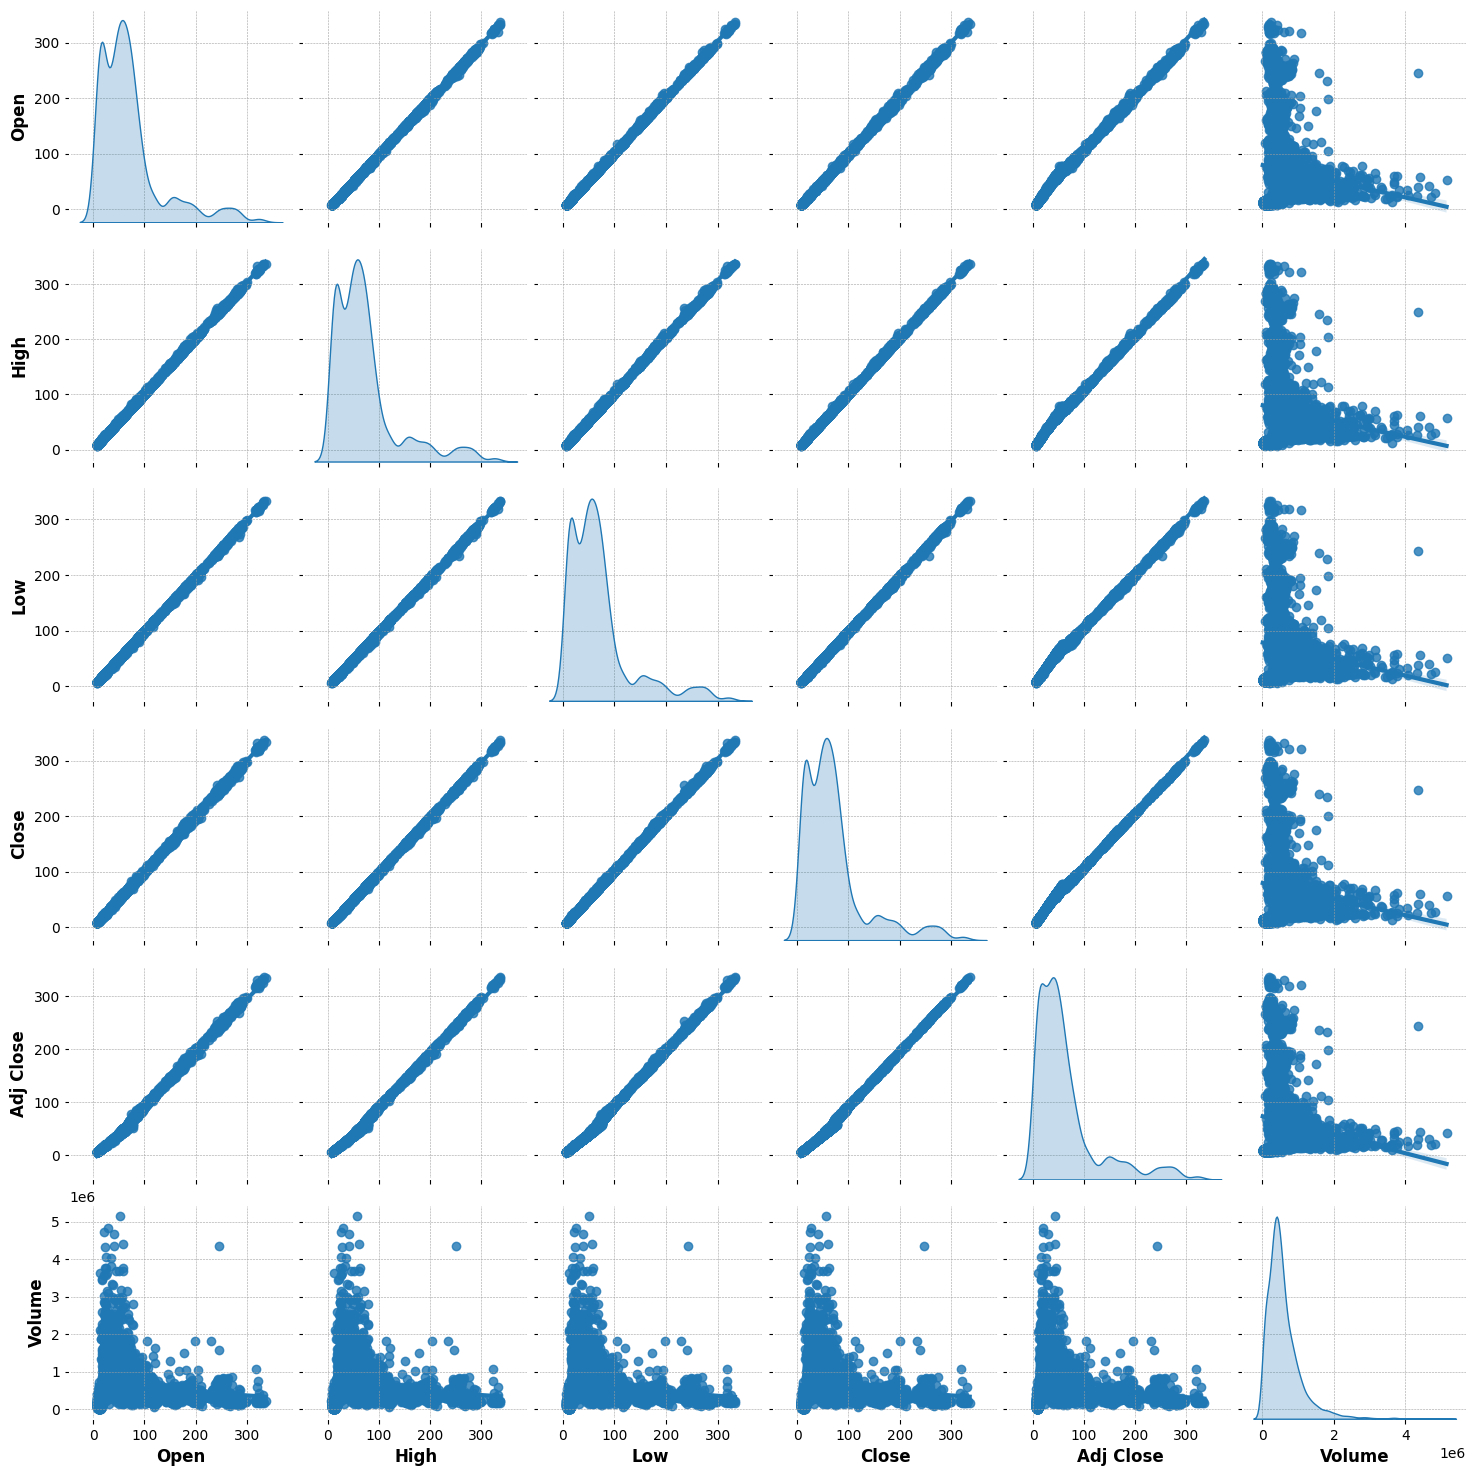

In [56]:
sns.pairplot(df[con_cols], kind= 'reg', diag_kind='kde')

In [57]:
df.columns[:-1]

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

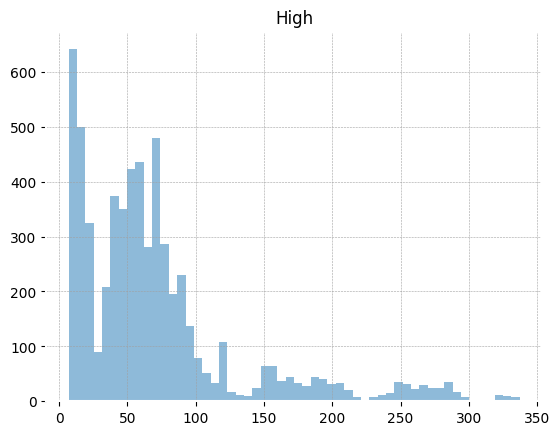

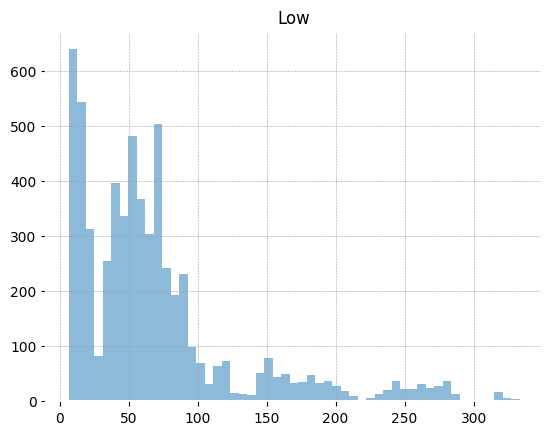

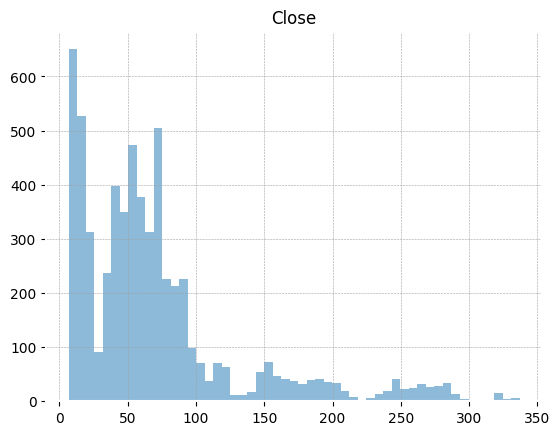

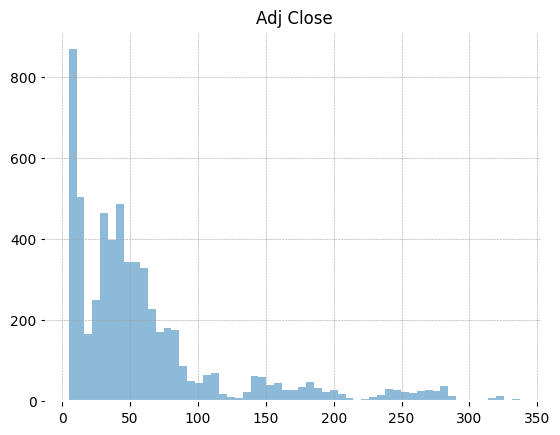

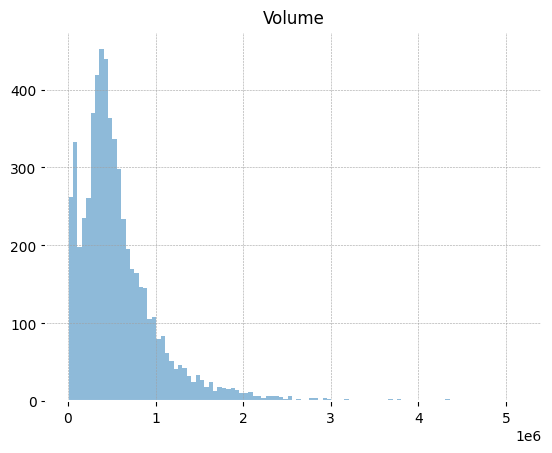

In [58]:
for i, col in enumerate(df.columns[1:]):
    plt.hist(df[col],alpha = 0.5, bins="auto")
    plt.title(col)
    plt.show()

In [59]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6035.000000,6035.000000,6035.000000,6035.000000,6035.000000,6.035000e+03
mean,71.067978,71.983056,70.136290,71.079825,62.832499,5.859031e+05
std,62.498036,63.173036,61.854589,62.545631,63.264048,5.005749e+05
min,6.740000,6.970000,6.575000,6.740000,4.847087,7.400000e+03
25%,26.567499,27.605001,25.445000,26.524999,19.866309,2.879500e+05
50%,56.380001,57.099998,55.590000,56.330002,43.784885,4.635000e+05
75%,83.360001,84.270001,82.290001,83.250000,73.784634,7.470000e+05
max,336.609985,337.109985,333.299988,336.899994,336.899994,5.155700e+06


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6035 entries, 2000-04-03 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6035 non-null   float64
 1   High       6035 non-null   float64
 2   Low        6035 non-null   float64
 3   Close      6035 non-null   float64
 4   Adj Close  6035 non-null   float64
 5   Volume     6035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 330.0 KB


In [61]:
df[con_cols].corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999868,0.999861,0.999711,0.997974,-0.116788
High,0.999868,1.000000,0.999832,0.999874,0.998131,-0.113177
Low,0.999861,0.999832,1.000000,0.999861,0.998139,-0.120328
Close,0.999711,0.999874,0.999861,1.000000,0.998259,-0.116522
Adj Close,0.997974,0.998131,0.998139,0.998259,1.000000,-0.138288
Volume,-0.116788,-0.113177,-0.120328,-0.116522,-0.138288,1.000000


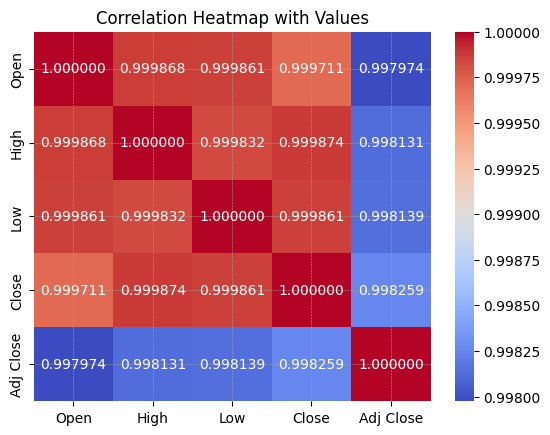

In [62]:
heatmap = sns.heatmap(df[con_cols[:-1]].corr(), annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Correlation Heatmap with Values')
plt.show()

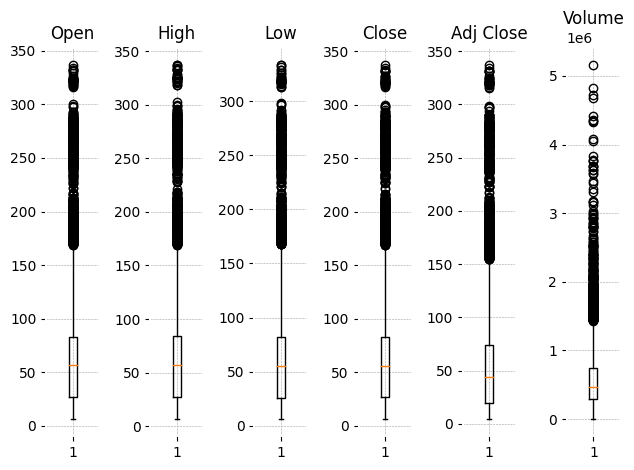

In [63]:
for i, col in enumerate(df[con_cols].columns):
    plt.subplot(1, len(df[con_cols].columns), i+1)
    plt.boxplot(df[col])
    plt.title(col)
    # plt.show()
plt.tight_layout()
plt.show()

In [64]:
import mplfinance as mpf

/home/its_relative/.local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


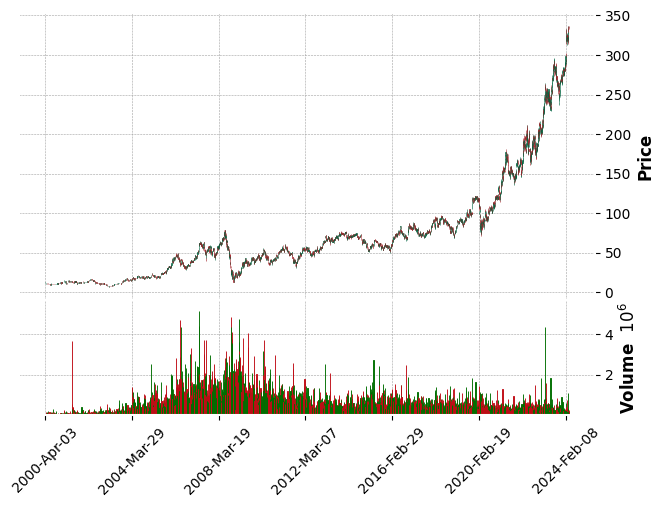

In [65]:
mpf.plot(df, type='candle', ylabel='Price', volume=True, style='charles')


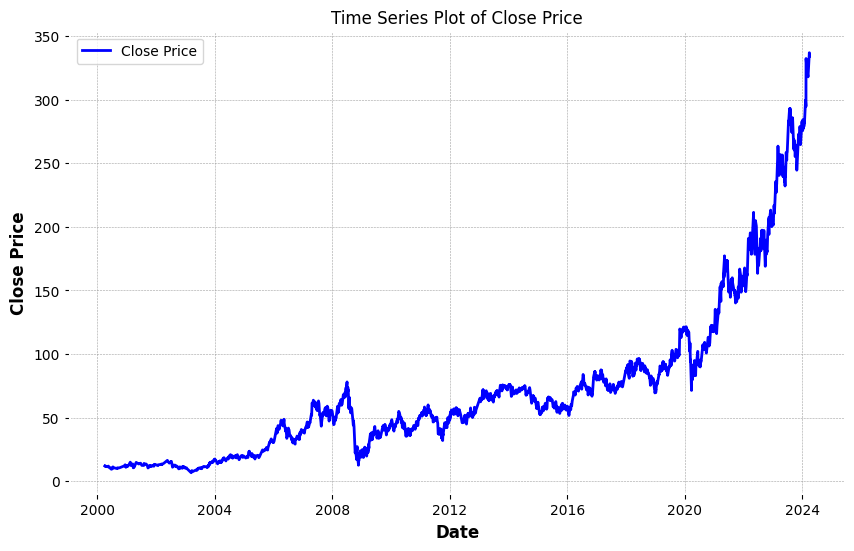

In [66]:
# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Plot of Close Price')
plt.legend()
plt.grid(True)
plt.show()

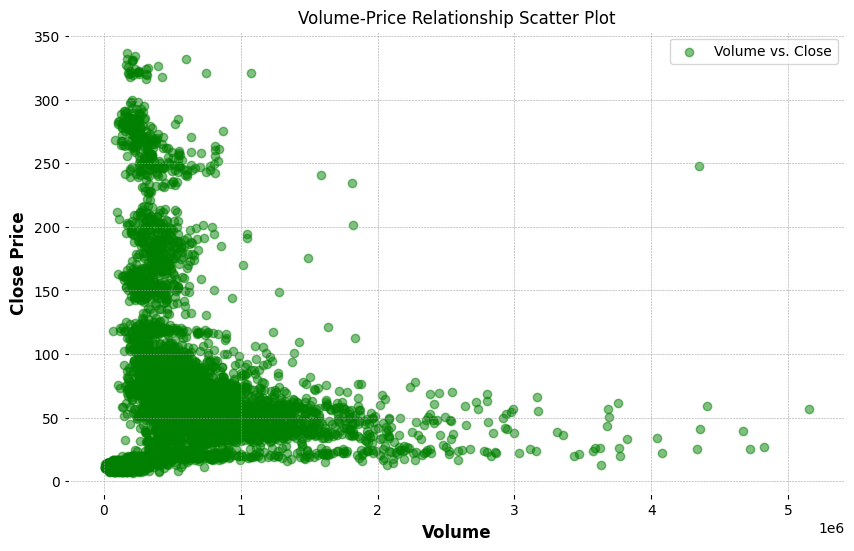

In [67]:

# Plotting the volume-price relationship scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], label='Volume vs. Close', color='green', alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Volume-Price Relationship Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()


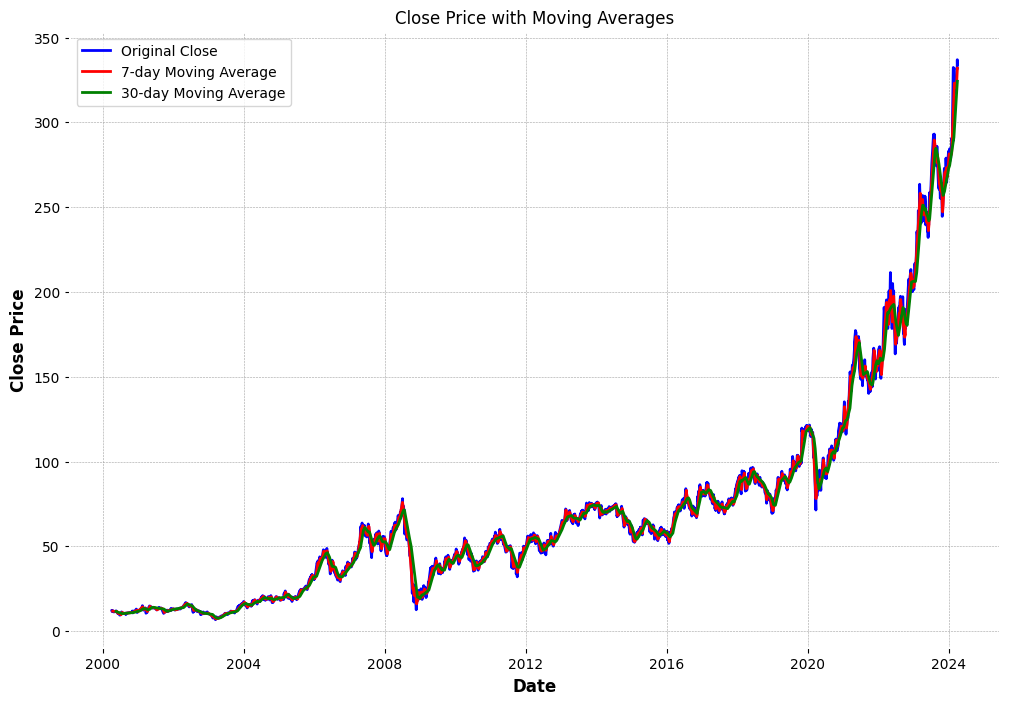

In [68]:
# Calculate moving averages (e.g., 7-day, 30-day)
df['Close_7day_MA'] = df['Close'].rolling(window=7).mean()
df['Close_30day_MA'] = df['Close'].rolling(window=30).mean()

# Plotting the original data and moving averages
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'], label='Original Close', color='blue')
plt.plot(df.index, df['Close_7day_MA'], label='7-day Moving Average', color='red')
plt.plot(df.index, df['Close_30day_MA'], label='30-day Moving Average', color='green')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()



<Figure size 1200x600 with 0 Axes>

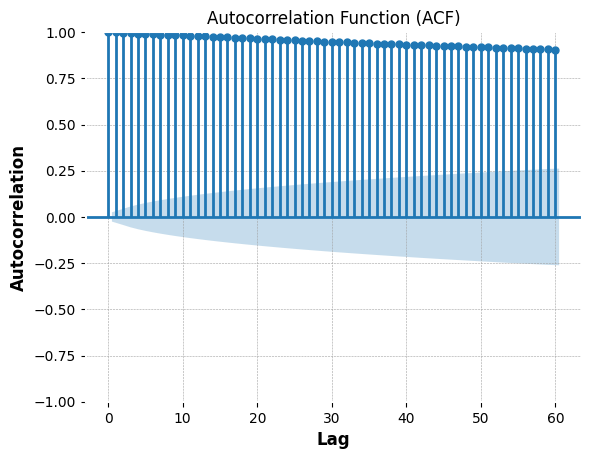

<Figure size 1200x600 with 0 Axes>

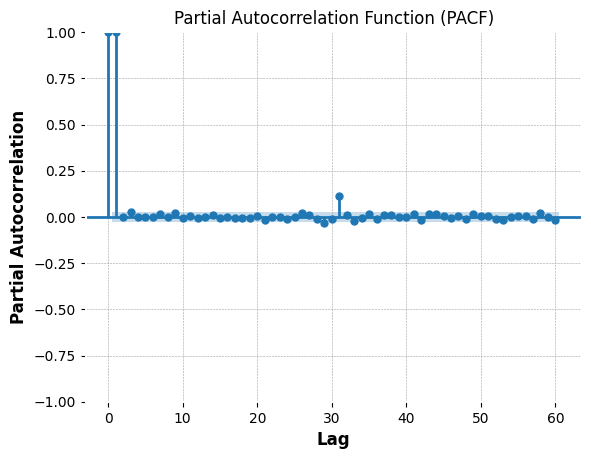

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation Plot (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df['Close'], lags=60, alpha=0.05) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()

# Partial Autocorrelation Plot (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(df['Close'], lags=60, alpha=0.05) 
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

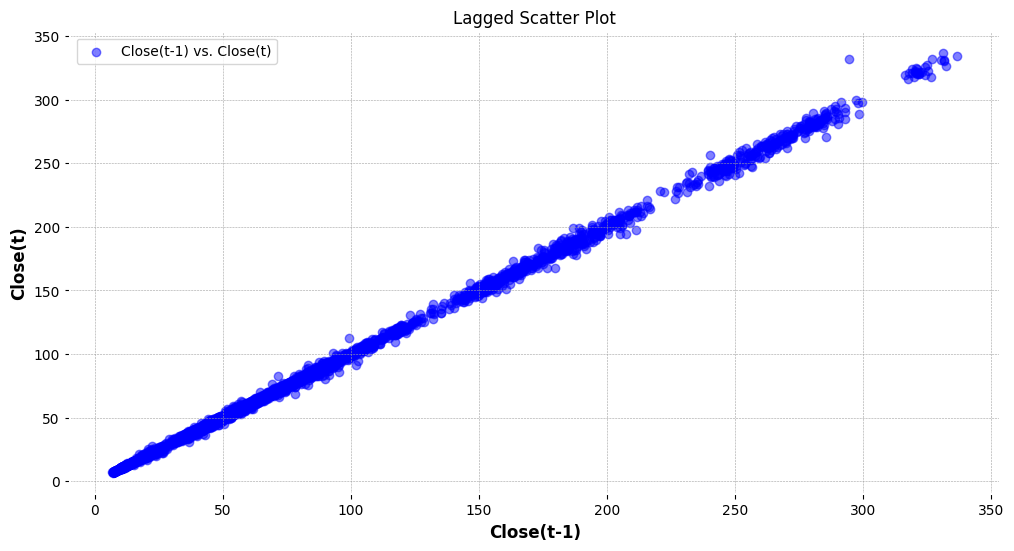

In [70]:

# Lagged Scatter Plots
plt.figure(figsize=(12, 6))
plt.scatter(df['Close'].shift(1), df['Close'], label='Close(t-1) vs. Close(t)', color='blue', alpha=0.5)
plt.xlabel('Close(t-1)')
plt.ylabel('Close(t)')
plt.title('Lagged Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()



# Building Models

Predicting the closing stock price of Reliance

In [71]:
import yfinance as yf
from datetime import datetime
ticker = "RS"
start = "2000-03-01"
end = datetime.now()
df = yf.download(tickers=ticker, start= start, end= end)


[*********************100%%**********************]  1 of 1 completed


In [72]:
# here we are printing shape of data
df.shape

(6073, 6)

In [73]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-01,9.687500,10.312500,9.687500,10.125000,7.049351,60200
2000-03-02,10.062500,10.156250,9.875000,9.875000,6.875297,16600
2000-03-03,9.750000,10.093750,9.625000,10.093750,7.027592,19400
2000-03-06,10.031250,10.062500,8.812500,9.000000,6.266091,121800
2000-03-07,9.125000,9.375000,9.125000,9.281250,6.461906,70800
...,...,...,...,...,...,...
2024-04-15,329.920013,330.459991,323.399994,325.230011,325.230011,175800
2024-04-16,323.079987,323.880005,319.390015,322.880005,322.880005,160600
2024-04-17,326.809998,326.859985,322.040009,322.119995,322.119995,145800


Create a new data frame with only the closing price and convert it to an array. Here we are taking about 80% of the data as the training data.

In [74]:
import math

In [75]:
#Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len # we will need the var for creating x_train, x_test and all.

4859

Now let's scale the data set to be values between 0 and 1 inclusive.

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
# Lets Scale all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_train = scaler.fit_transform(dataset[:training_data_len])
scaled_data_test = scaler.transform(dataset[training_data_len:])

In [78]:
scaled_data_train.shape

(4859, 1)

In [79]:
scaled_data_test.shape

(1214, 1)

In [80]:
# scaled_data_train[0:training_data_len].shape

In [81]:
#Creating the scaled training data set
train_data = scaled_data_train[0:training_data_len  , : ]

#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train, "Train")
        print(y_train,"Test")
        print()

[array([0.03768649, 0.03490314, 0.03733857, 0.02516144, 0.0282927 ,
       0.03246772, 0.03316355, 0.03177188, 0.03420731, 0.03351147,
       0.0321198 , 0.04603652, 0.0418615 , 0.04464485, 0.04325318,
       0.04012191, 0.03942608, 0.04777611, 0.05055946, 0.0495157 ,
       0.05090737, 0.05369072, 0.0495157 , 0.05890949, 0.05438655,
       0.05577823, 0.05925741, 0.05856157, 0.05612615, 0.05508239,
       0.05682198, 0.05543031, 0.0571699 , 0.05438655, 0.05682198,
       0.05403864, 0.05125529, 0.04916778, 0.05473447, 0.05160321,
       0.05195113, 0.05299488, 0.05299488, 0.05195113, 0.05264696,
       0.05229905, 0.05264696, 0.04916778, 0.05021154, 0.04742819,
       0.05299488, 0.05508239, 0.05856157, 0.05856157, 0.05786574,
       0.05508239, 0.05369072, 0.0495157 , 0.04638444, 0.04534069])] Train
[0.04429693082709728] Test

[array([0.03768649, 0.03490314, 0.03733857, 0.02516144, 0.0282927 ,
       0.03246772, 0.03316355, 0.03177188, 0.03420731, 0.03351147,
       0.0321198 , 0.046

In [82]:
#Lets Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [83]:
x_train.shape

(4799, 60)

In [84]:
y_train.shape

(4799,)

In [85]:
# Lets reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [86]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

2024-04-22 14:14:44.587388: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 14:14:44.589947: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 14:14:44.623424: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 14:14:44.623458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 14:14:44.624776: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [87]:
#Lets Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [88]:
# Lets Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [89]:
# Lets train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4799/4799 [==============================] - 59s 12ms/step - loss: 0.0011


In [90]:
scaled_data_train[-60:,:]

array([[0.92985977],
       [0.95012251],
       [0.94923182],
       [0.96125589],
       [0.97372522],
       [0.97428192],
       [0.96582053],
       [0.9405478 ],
       [0.94210647],
       [0.93564909],
       [0.94143849],
       [0.94121578],
       [0.9457805 ],
       [0.93954575],
       [0.92696507],
       [0.91560906],
       [0.919617  ],
       [0.91382768],
       [0.94188375],
       [0.94655984],
       [0.94589178],
       [0.94878648],
       [0.92707642],
       [0.92741041],
       [0.95079049],
       [0.94544652],
       [0.91638839],
       [0.92607438],
       [0.92997104],
       [0.94154976],
       [0.89378756],
       [0.91560906],
       [0.919617  ],
       [0.92184372],
       [0.90158098],
       [0.89735024],
       [0.91939437],
       [0.89356493],
       [0.86962815],
       [0.87096419],
       [0.85994217],
       [0.86929416],
       [0.87074147],
       [0.85203739],
       [0.8724115 ],
       [0.88733027],
       [0.88677356],
       [0.890

In [91]:
# scaled test data with 60 days of scaled training data
# Lets create testing data set
test_data = np.concatenate((scaled_data_train[-60:,:],(scaled_data_test)),axis = 0)
test_data

array([[0.92985977],
       [0.95012251],
       [0.94923182],
       ...,
       [3.51124475],
       [3.48942342],
       [3.48196391]])

In [92]:
test_data.shape

(1274, 1)

In [93]:
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [94]:
# Lets convert x_test to a numpy array  
x_test = np.array(x_test)

In [95]:
# Lets reshape the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [96]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

38/38 [==============================] - 1s 7ms/step


In [97]:
# Lets calculate the value of RMSE 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

20.984096764046082

/tmp/ipykernel_95917/2153467125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


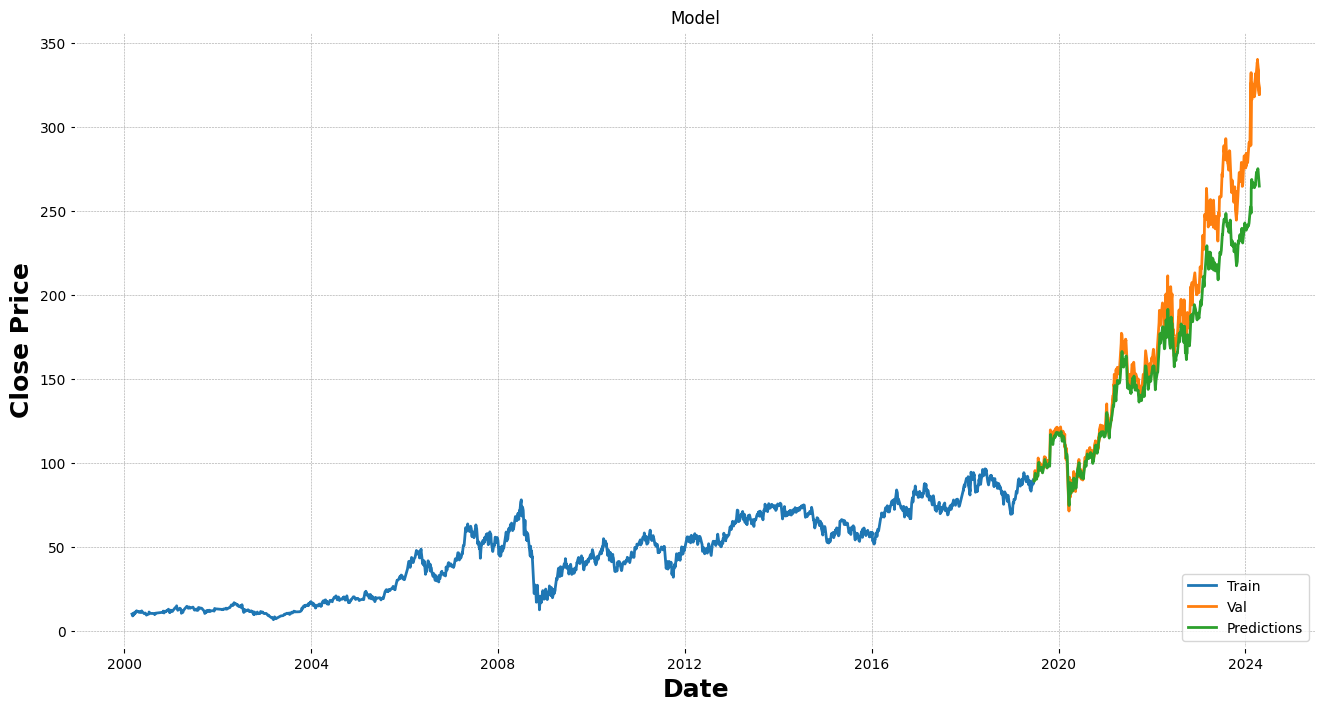

In [98]:
#Lets Plot the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [99]:
print(valid)

                 Close  Predictions
Date                               
2019-06-25   89.709999    89.278709
2019-06-26   92.050003    89.110527
2019-06-27   92.970001    89.868317
2019-06-28   94.620003    90.914604
2019-07-01   95.519997    92.286461
...                ...          ...
2024-04-15  325.230011   268.484558
2024-04-16  322.880005   267.382629
2024-04-17  322.119995   266.275330
2024-04-18  320.160004   265.660431
2024-04-19  319.489990   264.841095

[1214 rows x 2 columns]


### Evaluation

Lets calculate the r2 score of our model for evaluation

In [100]:
from sklearn.metrics import r2_score

r2 = r2_score(valid["Close"], valid["Predictions"])

In [101]:
prevR2 = 0.9937106223816641

In [102]:
r2

0.9014288176492574

In [103]:
x_test

array([[[0.92985977],
        [0.95012251],
        [0.94923182],
        ...,
        [0.93264311],
        [0.93019376],
        [0.92462707]],

       [[0.95012251],
        [0.94923182],
        [0.96125589],
        ...,
        [0.93019376],
        [0.92462707],
        [0.92373638]],

       [[0.94923182],
        [0.96125589],
        [0.97372522],
        ...,
        [0.92462707],
        [0.92373638],
        [0.94978853]],

       ...,

       [[3.07982634],
        [3.0598975 ],
        [3.05321775],
        ...,
        [3.54920961],
        [3.54586973],
        [3.51970622]],

       [[3.0598975 ],
        [3.05321775],
        [3.04687164],
        ...,
        [3.54586973],
        [3.51970622],
        [3.51124475]],

       [[3.05321775],
        [3.04687164],
        [3.05666907],
        ...,
        [3.51970622],
        [3.51124475],
        [3.48942342]]])

In [104]:
x_input = test_data[-100:]

len(x_input)

100

for 365 days

In [105]:
x_input = test_data[-60:]

len(x_input)

60

In [106]:
x_input = x_input.reshape(1,-1)

In [107]:
x_input.shape

(1, 60)

In [108]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [109]:
temp_input


[3.046871639192486,
 3.056669066318845,
 3.096192422814226,
 3.1619907283997275,
 3.102649972403752,
 3.149187411490219,
 3.1551995308202554,
 3.1384994636086176,
 3.16911625349662,
 3.2456025069637233,
 3.236361612838924,
 3.2606322956432074,
 3.247940421239506,
 3.14328673466599,
 3.205410835197238,
 3.6250278845160895,
 3.559229578930588,
 3.460588011687108,
 3.4461144162454462,
 3.4798485384224054,
 3.533511502605765,
 3.5498775820637194,
 3.5199287676830835,
 3.503896675978812,
 3.501224773949346,
 3.489645965548764,
 3.5073479960214518,
 3.490536826067744,
 3.5129146850919977,
 3.509686250060972,
 3.4854152274929513,
 3.464707307237114,
 3.5007793436898558,
 3.532954969604205,
 3.4792920054208456,
 3.494767564123557,
 3.495546642372993,
 3.544199450487367,
 3.564796268001134,
 3.61957263795135,
 3.6037630914949554,
 3.616009875402904,
 3.6143399366344875,
 3.6757960616583696,
 3.64551325952405,
 3.6339347908872055,
 3.6332664756161015,
 3.6937209771426707,
 3.6688934215730904,
 3

In [110]:
# demonstrate prediction for next 365 days
from numpy import array

lst_output=[]
n_steps=60  # 60 time steps
i=0
while(i<365):  # predicting for 365 days
    
    if(len(temp_input)>n_steps):  # condition based on n_steps
        x_input=np.array(temp_input[1:])[:n_steps]  # Slicing to ensure correct size
        if i <= 5:
            print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))  # Reshape to match model input
        yhat = model.predict(x_input, verbose=0)
        if i <= 5:
            print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        if i >= 360:
            print(yhat[0])
        
        temp_input.extend(yhat[0].tolist())
        if i> 360:    
            print(len(temp_input))
        
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)


1 day input [3.05666907 3.09619242 3.16199073 3.10264997 3.14918741 3.15519953
 3.13849946 3.16911625 3.24560251 3.23636161 3.2606323  3.24794042
 3.14328673 3.20541084 3.62502788 3.55922958 3.46058801 3.44611442
 3.47984854 3.5335115  3.54987758 3.51992877 3.50389668 3.50122477
 3.48964597 3.507348   3.49053683 3.51291469 3.50968625 3.48541523
 3.46470731 3.50077934 3.53295497 3.47929201 3.49476756 3.49554664
 3.54419945 3.56479627 3.61957264 3.60376309 3.61600988 3.61433994
 3.67579606 3.64551326 3.63393479 3.63326648 3.69372098 3.66889342
 3.71075503 3.67779999 3.66521956 3.62135402 3.60732585 3.54920961
 3.54586973 3.51970622 3.51124475 3.48942342 3.48196391 2.86782837]
1 day output [[2.6397986]]
2 day input [3.09619242 3.16199073 3.10264997 3.14918741 3.15519953 3.13849946
 3.16911625 3.24560251 3.23636161 3.2606323  3.24794042 3.14328673
 3.20541084 3.62502788 3.55922958 3.46058801 3.44611442 3.47984854
 3.5335115  3.54987758 3.51992877 3.50389668 3.50122477 3.48964597
 3.507348 

4 day output [[2.0908682]]
5 day input [3.14918741 3.15519953 3.13849946 3.16911625 3.24560251 3.23636161
 3.2606323  3.24794042 3.14328673 3.20541084 3.62502788 3.55922958
 3.46058801 3.44611442 3.47984854 3.5335115  3.54987758 3.51992877
 3.50389668 3.50122477 3.48964597 3.507348   3.49053683 3.51291469
 3.50968625 3.48541523 3.46470731 3.50077934 3.53295497 3.47929201
 3.49476756 3.49554664 3.54419945 3.56479627 3.61957264 3.60376309
 3.61600988 3.61433994 3.67579606 3.64551326 3.63393479 3.63326648
 3.69372098 3.66889342 3.71075503 3.67779999 3.66521956 3.62135402
 3.60732585 3.54920961 3.54586973 3.51970622 3.51124475 3.48942342
 3.48196391 2.86782837 2.63979864 2.4274714  2.24464774 2.09086823]
5 day output [[1.9629713]]
[[2.867828369140625], [2.639798641204834], [2.427471399307251], [2.244647741317749], [2.0908682346343994], [1.9629713296890259], [1.8579391241073608], [1.7732324600219727], [1.7063944339752197], [1.654787540435791], [1.615628719329834], [1.5861670970916748], [1.5

In [111]:
day_new=np.arange(1,61)
day_pred=np.arange(61,61+365)

In [112]:
import matplotlib.pyplot as plt


In [113]:
len(data)


6073

In [114]:
lst_output_withoutScale = scaler.inverse_transform(lst_output)

In [115]:
lst_output_withoutScale

array([[264.32833754],
       [243.84670788],
       [224.77547549],
       [208.35425493],
       [194.54177998],
       [183.05408026],
       [173.62008779],
       [166.01173541],
       [160.00834406],
       [155.37301299],
       [151.85576777],
       [149.20952492],
       [147.20603528],
       [145.64592746],
       [144.36364398],
       [143.22832997],
       [142.14240909],
       [141.0384677 ],
       [139.8751539 ],
       [138.63238064],
       [137.30652884],
       [135.9056076 ],
       [134.44515335],
       [132.94463209],
       [131.42459127],
       [129.90465753],
       [128.40226248],
       [126.931754  ],
       [125.50416069],
       [124.12717045],
       [122.80553735],
       [121.54133863],
       [120.33460641],
       [119.18368104],
       [118.08588568],
       [117.03770832],
       [116.03533711],
       [115.07482105],
       [114.15238043],
       [113.26446039],
       [112.40787014],
       [111.57978293],
       [110.77782172],
       [109

In [116]:
last_60_dayOut = scaler.inverse_transform(scaled_data_test[-60:])
print(last_60_dayOut)

[[280.41000366]
 [281.29000854]
 [284.83999634]
 [290.75      ]
 [285.42001343]
 [289.6000061 ]
 [290.14001465]
 [288.64001465]
 [291.39001465]
 [298.26000977]
 [297.42999268]
 [299.60998535]
 [298.47000122]
 [289.07000732]
 [294.6499939 ]
 [332.33999634]
 [326.42999268]
 [317.57000732]
 [316.26998901]
 [319.29998779]
 [324.11999512]
 [325.58999634]
 [322.8999939 ]
 [321.45999146]
 [321.22000122]
 [320.17999268]
 [321.76998901]
 [320.26000977]
 [322.26998901]
 [321.98001099]
 [319.79998779]
 [317.94000244]
 [321.17999268]
 [324.07000732]
 [319.25      ]
 [320.64001465]
 [320.70999146]
 [325.07998657]
 [326.92999268]
 [331.8500061 ]
 [330.42999268]
 [331.52999878]
 [331.38000488]
 [336.8999939 ]
 [334.17999268]
 [333.14001465]
 [333.07998657]
 [338.51000977]
 [336.27999878]
 [340.04000854]
 [337.07998657]
 [335.95001221]
 [332.01000977]
 [330.75      ]
 [325.52999878]
 [325.23001099]
 [322.88000488]
 [322.11999512]
 [320.16000366]
 [319.48999023]]


In [117]:
last_60_dayOut.shape

(60, 1)

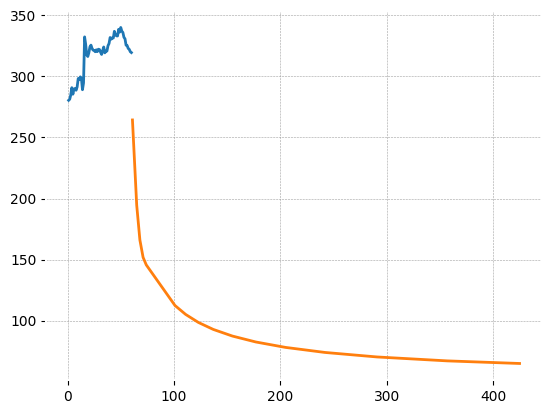

In [118]:
plt.plot(day_new,scaler.inverse_transform(scaled_data_test[-60:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

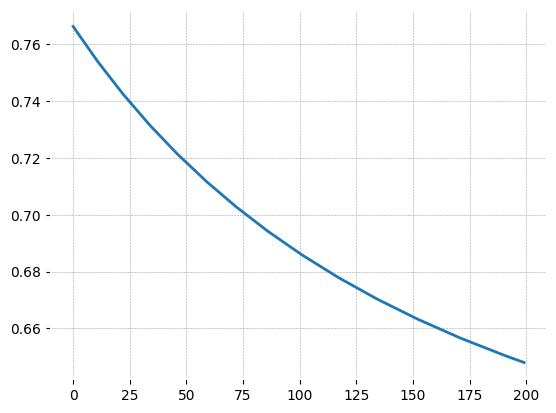

In [119]:
scaled_data = np.concatenate((scaled_data_train, scaled_data_test),axis = 0)
df3=scaled_data.tolist()
df3.extend(lst_output)
plt.plot(df3[-200:])
plt.show()

In [120]:
df3=scaler.inverse_transform(df3).tolist()


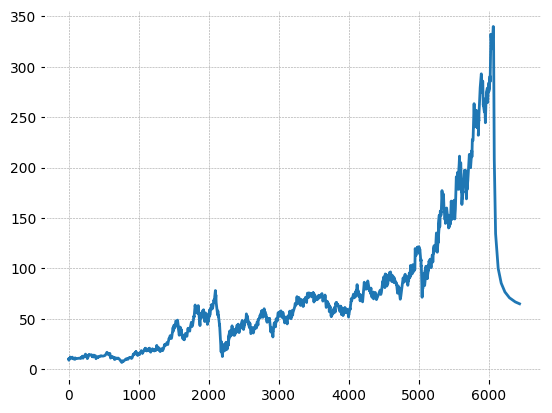

In [121]:
plt.plot(df3)
plt.show()


In [122]:
import pickle
import os

name1 = str(r2)[:5]
name2 = "lstmforecast.pkl"

full_name = name1+name2
# full_name
directory = './trained models/'
isfile = False

try:
    with open(f'{directory}{full_name}','r') as f:
        isfile = True
except Exception:
    pass
if isfile:
    new_rand = str(np.random.randint(1,10))
    new_name = new_rand+full_name
    with open(f'{directory}{new_name}', 'wb') as f:
        pickle.dump(model,f)
else:
    with open(f"{directory}{full_name}","wb") as f:
        pickle.dump(model,f)
